## Overview
The general flow on how the best model will be selected and built. The goal of the model is to be able to predict whether one is a promoter, detractor or neutral towards the airline based on the review they have written about the airline. This is so that the airline will be able to better themselves and improve the overall custoemr experience and thus increasing customer satisfaction and revenue at the same time.

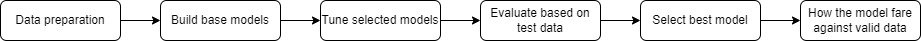

## Importing data

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt 
from imblearn.over_sampling import RandomOverSampler
import ast
from sklearn.utils.class_weight import compute_class_weight


In [2]:
train_df = pd.read_csv('cleaned_data.csv')
train_df

,overall_rating,NPS_score,remove_stopwords,removed_numbers,english_only,removed_mix,tokenized_chunking,lemmatized_column
0,Rated 1 out of 5 stars,Detractor,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...,sent text day flight home rush round new fligh...,sent text day flight home rush round new fligh...,"['sent', 'text', 'day', 'flight', 'home', 'rus...","['sent', 'text', 'day', 'flight', 'home', 'rus..."
1,9,Promoter,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...,flew lot flying time surprise swift service im...,flew lot flying time surprise swift service im...,"['flew', 'lot', 'flying', 'time', 'surprise', ...","['flew', 'lot', 'flying', 'time', 'surprise', ..."
2,Rated 5 out of 5 stars,Promoter,seful,seful,NaN,NaN,[],[]
3,Rated 1 out of 5 stars,Detractor,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...,one worst rance unhelpful customer not interes...,one worst rance unhelpful customer not interes...,"['one', 'worst', 'rance', 'unhelpful', 'custom...","['one', 'worst', 'rance', 'unhelpful', 'custom..."
4,Rated 1 out of 5 stars,Detractor,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...,single star lost baggage last month nearly blo...,single star lost baggage last month nearly blo...,"['single', 'star', 'lost', 'baggage', 'last', ...","['single', 'star', 'lost', 'baggage', 'last', ..."
...,...,...,...,...,...,...,...,...
61261,Rated 1 out of 5 stars,Detractor,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,"['till', 'waiting_refund', 'due', 'cancellatio...","['till', 'waiting_refund', 'due', 'cancellatio..."
61262,Rated 1 out of 5 stars,Detractor,orrible servicehy dont staff offer free water ...,orrible servicehy dont staff offer free water ...,dont staff offer free water plane h hot bad ai...,dont staff offer free water plane h hot bad ai...,"['dont', 'staff', 'offer', 'free', 'water', 'p...","['dont', 'staff', 'offer', 'free', 'water', 'p..."
61263,Rated 5 out of 5 stars,Promoter,ust booked first trip estet additional questio...,ust booked first trip estet additional questio...,ust booked first trip additional team via witt...,ust booked first trip additional team via witt...,"['ust', 'booked', 'first', 'trip', 'additional...","['ust', 'booked', 'first', 'trip', 'additional..."
61264,Rated 1 out of 5 stars,Detractor,getting 1 star zero not optionthey changing fl...,getting star zero not optionthey changing fli...,getting star zero not time sending us losing d...,getting star zero not time sending us losing d...,"['getting', 'star', 'zero', 'not', 'time', 'se...","['getting', 'star', 'zero', 'not', 'time', 'se..."


## Data preparation

### Encoding the data
Instead of using a Python library for this task, a mapping approach was used as it offers faster execution compared to using libraries. The purpose of encoding the target column is because computers handle numerical data more efficiently than textual data. By converting words to numerical representations, the model can better interpret and analyze the data, thus improving its performance.

### TFIDF
TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to convert text data into numerical vectors, where each vector represents a document. It measures the importance of a word in a document relative to its frequency across multiple documents. TF-IDF assigns higher weights to words that are more unique to a document and less frequent in the corpus.

### Count Vectoriser
Count Vectorizer is another method to convert text data into numerical vectors. It represents each document as a vector of word counts, where each element in the vector corresponds to the frequency of a specific word in the document. It is a simple and efficient way to transform text data into a format suitable for machine learning algorithms.

### Weighted Class
Weighted class refers to adjusting the class weights in a classification model to account for class imbalance or different importance of classes. It involves assigning higher weights to minority classes or less important classes to ensure that the model gives them appropriate consideration during training. This helps to address issues caused by class imbalance and improves the performance of the model on minority classes. This will be specified in the model's parameters.

### Oversampling
Oversampling is a technique used to address class imbalance by creating synthetic samples of the minority class. It involves increasing the number of instances in the minority class to balance the class distribution in the dataset. This helps to prevent the model from being biased towards the majority class and improves its ability to correctly classify instances from the minority class. Furthermore, we have to only apply oversampling to the training data as we do not want fictitious data in our test set.

### Why not undersampling
Undersampling was not performed during the data preparation, as it would significantly reduce the amount of textual data. This loss of data could potentially lead to the loss of valuable information, which might negatively impact the model's performance. Furthermore, given the already limited amount of data in the Neutral class, undersampling to match its size would further disadvantage the model.

In [3]:
train_df.dropna(inplace=True)


In [4]:
train_df['lemmatized_list'] = train_df['lemmatized_column'].apply(ast.literal_eval)
train_df['lemmatized_string'] = train_df['lemmatized_list'].apply(' '.join)

train_df

,overall_rating,NPS_score,remove_stopwords,removed_numbers,english_only,removed_mix,tokenized_chunking,lemmatized_column,lemmatized_list,lemmatized_string
0,Rated 1 out of 5 stars,Detractor,asyet sent text 400 day flight home cancelling...,asyet sent text day flight home cancelling fl...,sent text day flight home rush round new fligh...,sent text day flight home rush round new fligh...,"['sent', 'text', 'day', 'flight', 'home', 'rus...","['sent', 'text', 'day', 'flight', 'home', 'rus...","[sent, text, day, flight, home, rush, round, n...",sent text day flight home rush round new_fligh...
1,9,Promoter,ts years flew lot sia flying time ndia istara ...,ts years flew lot sia flying time ndia istara ...,flew lot flying time surprise swift service im...,flew lot flying time surprise swift service im...,"['flew', 'lot', 'flying', 'time', 'surprise', ...","['flew', 'lot', 'flying', 'time', 'surprise', ...","[flew, lot, flying, time, surprise, swift, ser...",flew lot flying time surprise swift service im...
3,Rated 1 out of 5 stars,Detractor,one worst experiences ir rance everude unhelpf...,one worst experiences ir rance everude unhelpf...,one worst rance unhelpful customer not interes...,one worst rance unhelpful customer not interes...,"['one', 'worst', 'rance', 'unhelpful', 'custom...","['one', 'worst', 'rance', 'unhelpful', 'custom...","[one, worst, rance, unhelpful, customer, not, ...",one worst rance unhelpful customer not interes...
4,Rated 1 out of 5 stars,Detractor,ot single star airlines deserves lost baggage ...,ot single star airlines deserves lost baggage ...,single star lost baggage last month nearly blo...,single star lost baggage last month nearly blo...,"['single', 'star', 'lost', 'baggage', 'last', ...","['single', 'star', 'lost', 'baggage', 'last', ...","[single, star, lost, baggage, last, month, nea...",single star lost baggage last month nearly blo...
5,Rated 1 out of 5 stars,Detractor,forced pay 150euro worth penalty failing onlin...,forced pay euro worth penalty failing online c...,forced pay worth penalty failing ho earth woul...,forced pay worth penalty failing ho earth woul...,"['forced', 'pay', 'worth', 'penalty', 'failing...","['forced', 'pay', 'worth', 'penalty', 'failing...","[forced, pay, worth, penalty, failing, ho, ear...",forced pay worth penalty failing ho earth woul...
...,...,...,...,...,...,...,...,...,...,...
61261,Rated 1 out of 5 stars,Detractor,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,till waiting refund due cancellation flight co...,"['till', 'waiting_refund', 'due', 'cancellatio...","['till', 'waiting_refund', 'due', 'cancellatio...","[till, waiting_refund, due, cancellation, flig...",till waiting_refund due cancellation flight co...
61262,Rated 1 out of 5 stars,Detractor,orrible servicehy dont staff offer free water ...,orrible servicehy dont staff offer free water ...,dont staff offer free water plane h hot bad ai...,dont staff offer free water plane h hot bad ai...,"['dont', 'staff', 'offer', 'free', 'water', 'p...","['dont', 'staff', 'offer', 'free', 'water', 'p...","[dont, staff, offer, free, water, plane, h, ho...",dont staff offer free water plane h hot bad ai...
61263,Rated 5 out of 5 stars,Promoter,ust booked first trip estet additional questio...,ust booked first trip estet additional questio...,ust booked first trip additional team via witt...,ust booked first trip additional team via witt...,"['ust', 'booked', 'first', 'trip', 'additional...","['ust', 'booked', 'first', 'trip', 'additional...","[ust, booked, first, trip, additional, team, v...",ust booked first trip additional team via witt...
61264,Rated 1 out of 5 stars,Detractor,getting 1 star zero not optionthey changing fl...,getting star zero not optionthey changing fli...,getting star zero not time sending us losing d...,getting star zero not time sending us losing d...,"['getting', 'star', 'zero', 'not', 'time', 'se

In [5]:
train_df['lemmatized_string'][0][0]

's'

In [6]:
X = train_df['lemmatized_string']
train_df["NPS_category"] = train_df["NPS_score"].map({"Detractor": 0, "Neutral": 1, "Promoter": 2})
y= train_df[['NPS_category']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(X_train)

X_train shape: (47536,)
X_test shape: (11884,)
y_train shape: (47536, 1)
y_test shape: (11884, 1)
35339    e bought flight show total hen landed found sh...
12737    explain single flight pain plus two cabin valu...
27484                                          flight good
40726    lew back night flight air hostess pouring coff...
27746    negative experience hey new luggage due normal...
                               ...                        
230      f_could give minus would tried call spent hold...
44967    previously written glowing report th told refu...
25594    ake people pay cabin hygiene insufficient paym...
26073    make big issue weight ie hand baggage excess w...
26377    via flight transit e land perfectly time round...
Name: lemmatized_string, Length: 47536, dtype: object


In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("The dimensions of the training set:", X_train_tfidf.shape)
print("The dimensions of the testing set:", X_test_tfidf.shape)

print("The features:\n", tfidf_vectorizer.get_feature_names_out())

df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("DataFrame for the training set:")
df_train_tfidf


The dimensions of the training set: (47536, 5000)
The dimensions of the testing set: (11884, 5000)
The features:
 ['aa' 'abandon' 'abandoned' ... 'zip' 'zipper' 'zone']
DataFrame for the training set:


,aa,abandon,abandoned,abhorrent,abide,ability,able,aboard,aborted,abrasive,...,york,youd,young,younger,youve,yr,zero,zip,zipper,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
count_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform on the training data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print("The dimensions of the training set:", X_train_count.shape)
print("The dimensions of the testing set:", X_test_count.shape)

print("The features:\n", count_vectorizer.get_feature_names_out())

df_train_count = pd.DataFrame(X_train_count.toarray(), columns=count_vectorizer.get_feature_names_out())

df_test_count = pd.DataFrame(X_test_count.toarray(), columns=count_vectorizer.get_feature_names_out())

print("DataFrame for the training set after dropping records with NaN:")
df_train_count

The dimensions of the training set: (47536, 5000)
The dimensions of the testing set: (11884, 5000)
The features:
 ['aa' 'abandon' 'abandoned' ... 'zip' 'zipper' 'zone']
DataFrame for the training set after dropping records with NaN:


,aa,abandon,abandoned,abhorrent,abide,ability,able,aboard,aborted,abrasive,...,york,youd,young,younger,youve,yr,zero,zip,zipper,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled_tfidf, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

df_train_resampled_tfidf = pd.DataFrame(X_train_resampled_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

X_train_resampled_count, y_train_resampled = smote.fit_resample(X_train_count, y_train)

df_train_resampled_count = pd.DataFrame(X_train_resampled_count.toarray(), columns=count_vectorizer.get_feature_names_out())

C:\Users\Ng Jun Ming\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Ng Jun Ming\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## Evaluating 
### Evaluation:
Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the classifier. In other words, it measures the accuracy of positive predictions. A high precision indicates that the classifier has a low false positive rate, meaning that when it predicts a positive result, it is likely to be correct.
 
Recall: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances in the data. It measures the classifier's ability to correctly identify positive instances. A high recall indicates that the classifier can effectively capture positive instances without missing many.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a useful metric when you want to find a balance between precision and recall, especially when the classes are imbalanced.

## Building base models
### Models:
Logistic Regression:
- How it works: Logistic Regression models the probability of a binary outcome using the logistic function. It calculates the probability that a given input belongs to a particular class.
- Why it's used for text classification: Logistic Regression is a simple and interpretable model that works well for linearly separable data, making it suitable for tasks like sentiment analysis, spam detection, and document classification.

Decision Tree:
- How it works: Decision Trees partition the feature space into disjoint regions, making decisions based on simple rules inferred from the data. Each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.
- Why it's used for text classification: Decision Trees are easy to understand and interpret, making them suitable for tasks where interpretability is important. They can handle both numerical and categorical data, making them versatile for text classification tasks.

Random Forest:
- How it works: Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes as the prediction (classification) of the individual trees.
- Why it's used for text classification: Random Forests are robust against overfitting and can handle high-dimensional data like text efficiently. They often provide high accuracy and are less sensitive to outliers and noise in the data, making them popular for text classification tasks.

Support Vector Machine (SVM):
- How it works: SVMs find the hyperplane that best separates the data into different classes. It maximizes the margin between the hyperplane and the nearest data points of any class.
- Why it's used for text classification: SVMs are effective in high-dimensional spaces and can handle non-linear data transformations through the use of kernel functions. They work well for text classification tasks with complex decision boundaries.

Naive Bayes:
- How it works: Naive Bayes is a probabilistic classifier based on Bayes' theorem with an assumption of independence between features. It calculates the probability of a given input belonging to each class and selects the class with the highest probability.
- Why it's used for text classification: Naive Bayes is simple, efficient, and easy to implement. Despite its "naive" assumption of feature independence, it often performs surprisingly well in practice for text classification tasks, especially with large feature spaces like those in text data.
- Drawback: Cannot do weighted class so will have to just do without the weighted class.


### TFIDF by Class weight 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Logistic Regression with increased max_iter
logistic_classifier = LogisticRegression(max_iter=1000, class_weight='balanced')

# Decision Tree with class_weight parameter
tree_classifier = DecisionTreeClassifier(class_weight='balanced')

# Random Forest with class_weight parameter
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Support Vector Machine (SVM) with class_weight parameter
svm_classifier = SVC(class_weight='balanced', probability=True)

# Naive Bayes (doesn't support class_weight parameter)
nb_classifier = MultinomialNB()

# List of classifiers
classifiers = [logistic_classifier, tree_classifier, rf_classifier, svm_classifier, nb_classifier]
classifier_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes']

for classifier, name in zip(classifiers, classifier_names):
    print(f"=== {name} ===")
    
    classifier.fit(X_train_tfidf, y_train)
    
    y_pred = classifier.predict(X_test_tfidf)

    for i, column in enumerate(y_test.columns):
        print(f"Classification Report for {column}:")
        print(classification_report(y_test[column], y_pred))
    print("\n")

=== Logistic Regression ===
Classification Report for NPS_category:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      9843
           1       0.10      0.38      0.16       284
           2       0.74      0.80      0.77      1757

    accuracy                           0.86     11884
   macro avg       0.61      0.69      0.62     11884
weighted avg       0.92      0.86      0.89     11884



=== Decision Tree ===
Classification Report for NPS_category:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      9843
           1       0.09      0.15      0.11       284
           2       0.60      0.63      0.62      1757

    accuracy                           0.84     11884
   macro avg       0.54      0.56      0.55     11884
weighted avg       0.86      0.84      0.85     11884



=== Random Forest ===
Classification Report for NPS_category:
              precision    recall  f1-scor

### Count vectoriser by Class weights

In [12]:
for classifier, name in zip(classifiers, classifier_names):
    print(f"=== {name} ===")
    
    classifier.fit(X_train_count, y_train)
    
    y_pred = classifier.predict(X_test_count)

    for i, column in enumerate(y_test.columns):
        print(f"Classification Report for {column}:")
        print(classification_report(y_test[column], y_pred))
    print("\n")

=== Logistic Regression ===
Classification Report for NPS_category:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      9843
           1       0.11      0.31      0.16       284
           2       0.71      0.82      0.76      1757

    accuracy                           0.87     11884
   macro avg       0.60      0.67      0.62     11884
weighted avg       0.91      0.87      0.89     11884



=== Decision Tree ===
Classification Report for NPS_category:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      9843
           1       0.10      0.20      0.13       284
           2       0.59      0.66      0.62      1757

    accuracy                           0.84     11884
   macro avg       0.54      0.58      0.55     11884
weighted avg       0.87      0.84      0.85     11884



=== Random Forest ===
Classification Report for NPS_category:
              precision    recall  f1-scor

### TFIDF by Oversampling

In [13]:
classifiers_o = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    MultinomialNB()
]

for clf in classifiers_o:
    clf.fit(X_train_resampled_tfidf, y_train_resampled)
    
    y_pred = clf.predict(X_test_tfidf)
    
    print(f"=== Classification Report for {clf.__class__.__name__} ===")
    print(classification_report(y_test, y_pred))
    print()

=== Classification Report for LogisticRegression ===
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      9843
           1       0.10      0.38      0.16       284
           2       0.75      0.76      0.76      1757

    accuracy                           0.87     11884
   macro avg       0.61      0.68      0.62     11884
weighted avg       0.92      0.87      0.89     11884


=== Classification Report for DecisionTreeClassifier ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      9843
           1       0.08      0.16      0.11       284
           2       0.57      0.62      0.60      1757

    accuracy                           0.83     11884
   macro avg       0.53      0.56      0.54     11884
weighted avg       0.86      0.83      0.84     11884


=== Classification Report for RandomForestClassifier ===
              precision    recall  f1-score   support

           0  

### Count vectoriser by Oversampling

In [14]:
for clf in classifiers_o:
    clf.fit(X_train_resampled_count, y_train_resampled)  # Flattening y_train_resampled
    
    y_pred = clf.predict(X_test_count)
    
    print(f"=== Classification Report for {clf.__class__.__name__} ===")
    print(classification_report(y_test, y_pred))
    print()

=== Classification Report for LogisticRegression ===
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      9843
           1       0.10      0.24      0.14       284
           2       0.75      0.80      0.77      1757

    accuracy                           0.88     11884
   macro avg       0.60      0.65      0.62     11884
weighted avg       0.91      0.88      0.90     11884


=== Classification Report for DecisionTreeClassifier ===
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      9843
           1       0.07      0.21      0.10       284
           2       0.50      0.61      0.55      1757

    accuracy                           0.79     11884
   macro avg       0.50      0.55      0.51     11884
weighted avg       0.85      0.79      0.82     11884


=== Classification Report for RandomForestClassifier ===
              precision    recall  f1-score   support

           0  

### Conclusion:
Using precision as the main evaluation, we pick the random forest using tfidf and weighted class as it has the overall highest precision out of all of the models. Precision for class 0: 0.92, Precision for class 1: 0.83, Precision for class 2: 0.87. This is because the f1-score and recall of all the models built was roughly the same. This is also because we want to ensure that when we predict a class it is indeed that class as that is what the precision looks at and tells us. Thus, putting the precision score as the main evaluation is justified. According to this using random forest along with tfidf and weighted class gives us the best model

Some other model build is for example TFIDF/ Count vectorizer using oversampling the precision for class 1 never passed the 0.5 mark. The image above shows the second-best model Naïve bayes using TFIDF by class weight. The precision of class 0 and 1 is higher than that of those of naïve bayes in random forest. The only advantage is that the precision of naïve bayes class 2 is higher which is a tradeoff we are willing to make as the class 0 (detractor) is what our business objective is looking at. Furthermore, the F1-score of naïve bayes is just lower overall which shows that it is a weaker model than random forest in distinguishing the classes. 

## Tuning best base model
### Parameters:
- n_estimators: This parameter determines the number of decision trees in the random forest. Increasing the number of trees can lead to better performance, but it also increases computational cost.

- max_depth: This parameter controls the maximum depth of each decision tree in the random forest. Deeper trees can capture more complex patterns in the data, but they are more likely to overfit.

- min_samples_split: This parameter sets the minimum number of samples required to split an internal node during the construction of a decision tree. It helps prevent overfitting by controlling the number of samples required to make a split.

- min_samples_leaf: This parameter sets the minimum number of samples required to be at a leaf node. It helps prevent overfitting by controlling the size of the leaves of the decision trees.

Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9843
           1       0.37      0.10      0.16       284
           2       0.72      0.78      0.75      1757

    accuracy                           0.91     11884
   macro avg       0.68      0.61      0.62     11884
weighted avg       0.90      0.91      0.90     11884



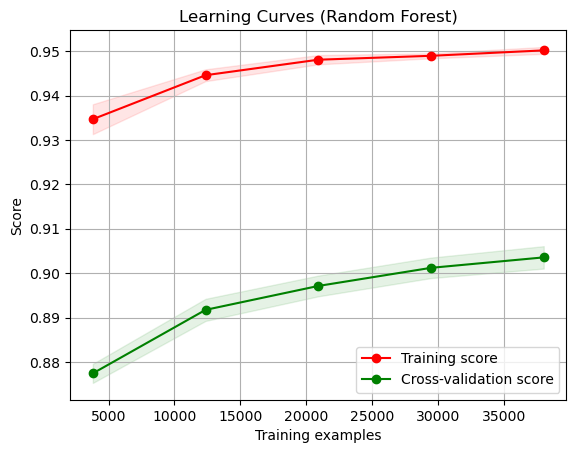

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import column_or_1d
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve


# turning off the warning
y_train_reshaped = column_or_1d(y_train, warn=False)
y_test_reshaped = column_or_1d(y_test, warn=False)

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [10,20,30,40],
    'min_samples_leaf': [5, 15,25, 35]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train_reshaped)

print("Best Parameters:", grid_search.best_params_)

best_rf_classifier = grid_search.best_estimator_

y_pred = best_rf_classifier.predict(X_test_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier(class_weight='balanced', random_state=42, **grid_search.best_params_)
plot_learning_curve(estimator, title, X_train_tfidf, y_train_reshaped, cv=5, n_jobs=-1)

plt.show()

The training score seems to be hitting a limit, this means that it increases at a decrasing rate never exceeding a number. In this case that number is 0.96. Thus it would be meaningless to keep increasing the range of the parameters.

### Evaluating the tuned model against base model
The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classification model across various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values.
- True Positive Rate (TPR), also known as sensitivity or recall, measures the proportion of positive instances that are correctly identified by the model.
- False Positive Rate (FPR) measures the proportion of negative instances that are incorrectly classified as positive by the model.

The Area Under the ROC Curve (AUC) quantifies the overall performance of the binary classification model. It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. AUC values range from 0 to 1, where higher values indicate better performance. An AUC of 0.5 suggests a model with no discriminatory power (random guessing), while an AUC of 1 represents a perfect model that perfectly separates the classes.

For ROC, the closer it is to creating a right angle at the top left corner the better as the tradeoff between True positive rate and False Positive rate is none which means that it is able to have a 100% True positive rate but 0% False Positive rate. which we cannot really tell the difference thus we will look at the AUC.

AUC:
- Class 0 has a very high AUC of 0.93, indicating excellent performance in distinguishing between class 0 and other classes.
- Class 1 has a lower AUC of 0.78, suggesting less discriminatory power compared to class 0 and class 2.
- Class 2 has a high AUC of 0.94, indicating strong performance in distinguishing between class 2 and other classes.

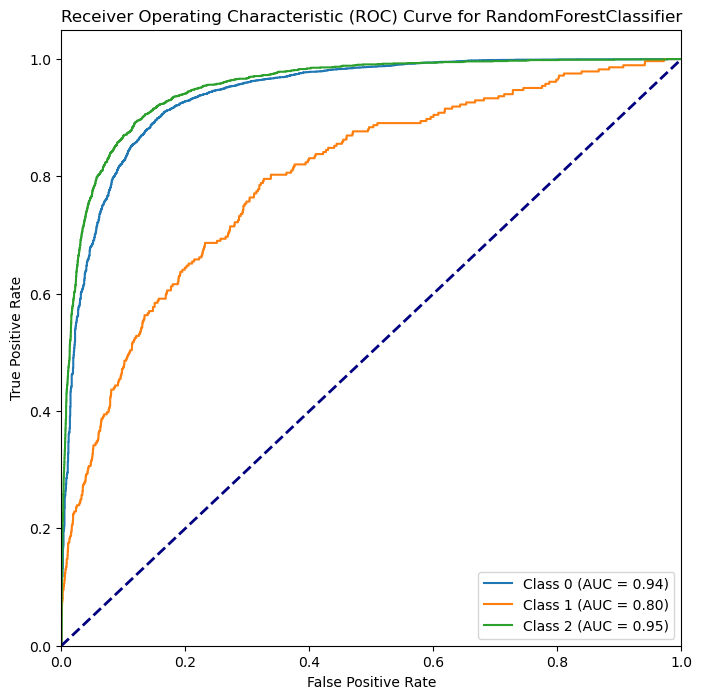

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

num_classes = len(np.unique(y_train))
y_train_binarized = label_binarize(y_train, classes=range(num_classes))

y_test_binarized = label_binarize(y_test, classes=range(num_classes))

best_rf_classifier.fit(X_train_tfidf, y_train)

y_pred_proba = best_rf_classifier.predict_proba(X_test_tfidf)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      9843
           1       0.83      0.07      0.12       284
           2       0.87      0.63      0.73      1757

    accuracy                           0.91     11884
   macro avg       0.87      0.56      0.60     11884
weighted avg       0.91      0.91      0.90     11884



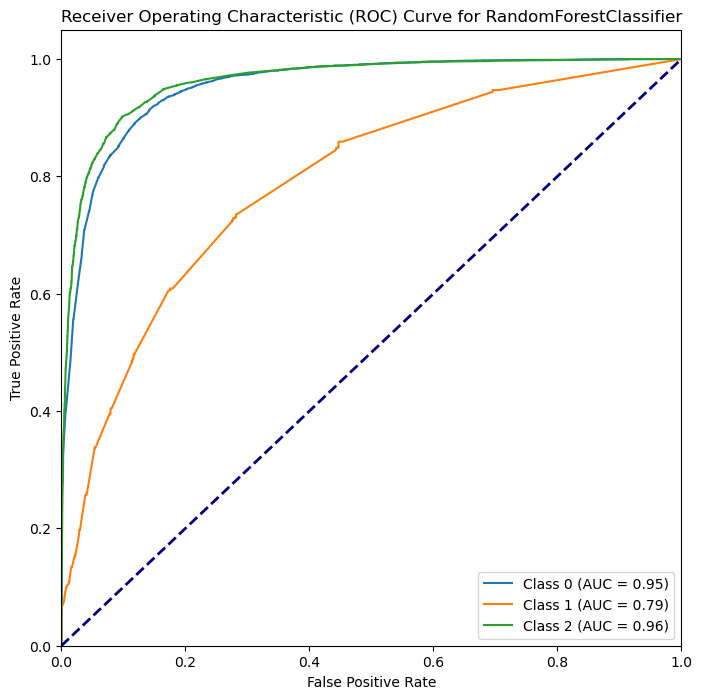

In [17]:
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)

print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_proba = rf_classifier.predict_proba(X_test_tfidf)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

From the ROC curve, we can tell that there is a tradeoff between Class 0 (Promoter) and Class 1 (Neutral) when tuning. Although class 1 increases, Class 0 (Detractor) AUC decreases. This is not beneficial to us as our main focus is to find the promoters and detractors of the reviews, the neutral class (Class 1) is important but not as important as Class 0 (Detractor) or Class 2 (Promoter). Thus we wouldn't want to sacrifice the AUC of Class 0 (Detractor) and Class 2 (Promoter) for Class 1 Neutral). Thus, using this set of metrics, the base model would perform better in our business case compared to the tuned model.

### Test data to evaluate the model

Preparing the validation dataset as the same way as the training. This is important as it ensures consistency in preprocessing steps and feature engineering, thus enabling a fair and unbiased evaluation of the model's performance on unseen data.

In [18]:
preprocessed_test = pd.read_csv('test_preprocessed.csv')
preprocessed_test['lemmatized_list'] = preprocessed_test['lemmatized_column'].apply(ast.literal_eval)
preprocessed_test['lemmatized_string'] = preprocessed_test['lemmatized_list'].apply(' '.join)
X_valid = preprocessed_test['lemmatized_string']
preprocessed_test["NPS_category"] = preprocessed_test["NPS_score"].map({"Detractor": 0, "Neutral": 1, "Promoter": 2})
y_valid= preprocessed_test[['NPS_category']]

From the classification report below, we can see that the evaluation metrics are around the same scores as before on the validation data, which the model has not seen before. This suggests that there is no overfitting in the model and it is able to perform as well as expected based on the test data. The only concern is the Neutral class (Class 1), which has a very low F1-score. However, this is a tradeoff we are willing to take as, during tuning, it compromises the other classes. Furthermore, the business objective does not put as much emphasis on Class 1 as on the other two classes. This is because the neutral class will neither hurt nor promote the business, so its magnitude of effect will be lesser than the other two classes.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train_tfidf,y_train)

X_valid_tfidf = tfidf_vectorizer.transform(X_valid)

y_pred_valid = rf_classifier.predict(X_valid_tfidf)

print("Classification Report:")
print(classification_report(y_valid, y_pred_valid))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12570
           1       0.79      0.05      0.10       370
           2       0.78      0.67      0.72      2407

    accuracy                           0.90     15347
   macro avg       0.83      0.56      0.59     15347
weighted avg       0.89      0.90      0.89     15347



From the confusion matrix below, the overall misclassification rate is very low. However, when we examine the misclassification rate for each class, it seems that Class 0 and 2 have relatively low rates compared to Class 1. This suggests that the model struggles to predict Class 1 as effectively as the other two classes. However, this isn't a significant issue because:
1. Neutral classes (Class 1) do not appear frequently.
2. They have less impact than the other two classes.

Thus, this model proves to be quite effective for our business scenario. In our business context, we are particularly interested in predicting detractors. Detractors are defined as individuals who actively undermine the business. Predicting these detractors and addressing their criticisms can help the business improve its overall quality. In this case, the misclassification rate for detractors is extremely low, at around 3%, which is excellent for the business. Additionally, the high recall, precision, and F1 score from above further support the notion that the model excels at detecting detractors

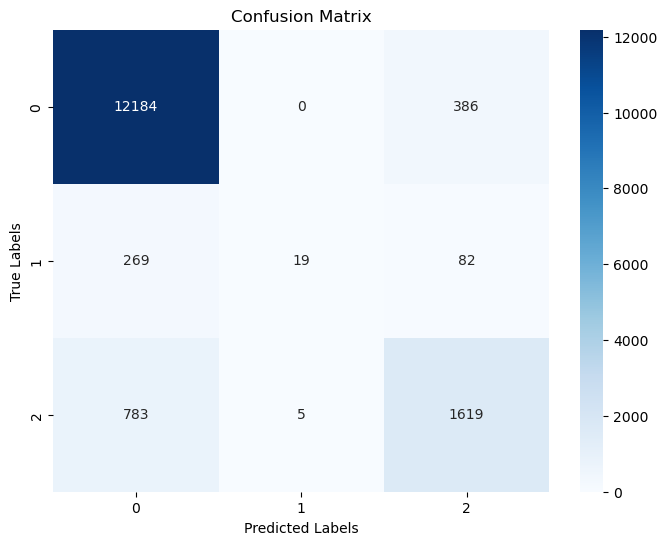

Misclassification Score: 0.09936795464911709
Misclassification Scores for Individual Classes:
Class 0: 0.0307
Class 1: 0.9486
Class 2: 0.3274


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_valid, y_pred_valid)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

total_misclassifications = conf_matrix.sum() - np.trace(conf_matrix)

misclassification_score = total_misclassifications / conf_matrix.sum()

print("Misclassification Score:", misclassification_score)

misclassification_scores = {}
for i in range(len(rf_classifier.classes_)):
    total_class_instances = conf_matrix.sum(axis=1)[i]
    misclassified_instances = total_class_instances - conf_matrix[i, i]
    misclassification_scores[rf_classifier.classes_[i]] = misclassified_instances / total_class_instances

print("Misclassification Scores for Individual Classes:")
for class_label, score in misclassification_scores.items():
    print(f"Class {class_label}: {score:.4f}")

In [21]:
single_sentence = preprocessed_test['lemmatized_string'].iloc[55]  # Change the index to the desired row number
print('Original_sentence:', preprocessed_test['review_text'][55])

X_single = tfidf_vectorizer.transform([single_sentence])

y_pred_single = rf_classifier.predict(X_single)

print("Predicted NPS Class:", y_pred_single)
print('Actual:', y_valid.iloc[55])

Original_sentence: I bought a flight from Berlin to London. At arrival in Berlin, I was told that the airline had oversold the seats ( it turned out to be 10) and that I woud need to go to my gate to ask if I can fly. At the gate, I was told to wait, while all other people were given a seat. I was waiting for 1.5h as flight was late. I was the only person that wasn’t British or American, so it felt like it might have been a reason why I was left without the seat.

I couldn’t get a drink or food, as it wasn’t clear when they might need me at the gate. No one came to support me, although I was visibly stressed.

When I was finally told that I will get a seat, and after everyone already boarded the place, I asked about my seat number. I confirmed it again with the flight attendant at the entrance. However, when I approached my seat, it was already taken and I had to find a random one elsewhere. No one offered me anything to eat on the plane.

I arrived to London with a headache and a stom